In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('E-commerce Customer Behavior.csv')


In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.shape

(350, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
df.isnull().sum()


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.isnull().sum()


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [10]:
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_membership = LabelEncoder()
le_satisfaction = LabelEncoder()

In [11]:
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['Membership Type'] = le_membership.fit_transform(df['Membership Type'])
df['Satisfaction Level'] = le_satisfaction.fit_transform(df['Satisfaction Level'])
df['Discount Applied'] = df['Discount Applied'].astype(int)

In [12]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2


In [13]:
features = df[['Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']]


In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
pd.DataFrame(scaled_features, columns=features.columns).head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,-1.005764,-0.939761,0.872459,-0.010582,0.754230,0.330381,0.996757,0.994269,-0.120022
1,0.994269,0.086720,-0.299803,1.216880,-0.186319,-0.394236,0.132172,-1.005764,-0.640260
2,-1.005764,1.934386,-1.472065,-1.238043,-0.933192,-0.877314,-1.078247,0.994269,1.143413
3,0.994269,-0.734465,1.458591,-0.010582,1.751261,1.538076,1.169674,-1.005764,-1.086179
4,0.994269,-1.350354,0.286328,1.216880,-0.352721,0.088842,-0.040745,0.994269,2.109570


In [16]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

c:\Users\rizwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rizwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rizwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rizwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

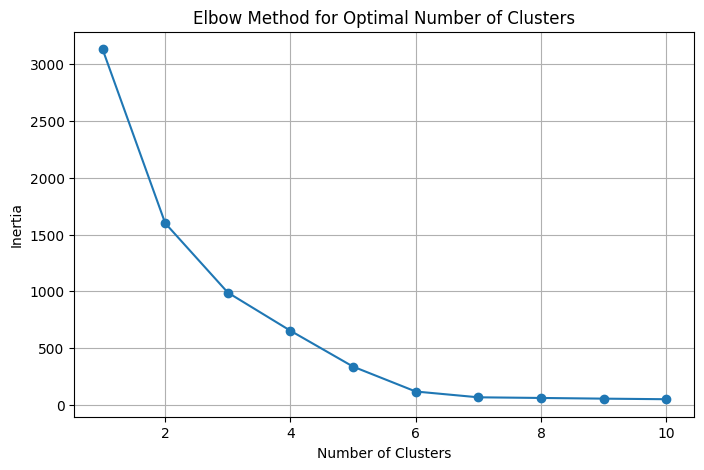

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [18]:
optimal_k = 3  # Adjust this value based on the elbow plot

# Apply K-Means Clustering with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(scaled_features)

c:\Users\rizwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
0,101,0,29,4,1,1120.20,14,4.6,1,25,1,2
1,102,1,34,2,2,780.50,11,4.1,0,18,0,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2,1
3,104,1,30,5,1,1480.30,19,4.7,0,12,1,2
4,105,1,27,3,2,720.40,13,4.0,1,55,2,0


In [20]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.5355


In [21]:
cluster_summary = df.groupby('Cluster').agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean',
    'Days Since Last Purchase': 'mean'
}).reset_index()

In [22]:
cluster_summary

,Cluster,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,0,748.432479,11.658120,4.051282,30.256410
1,1,474.223684,8.517544,3.326316,31.780702
2,2,1311.144444,17.615385,4.675214,17.940171


In [23]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [24]:
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

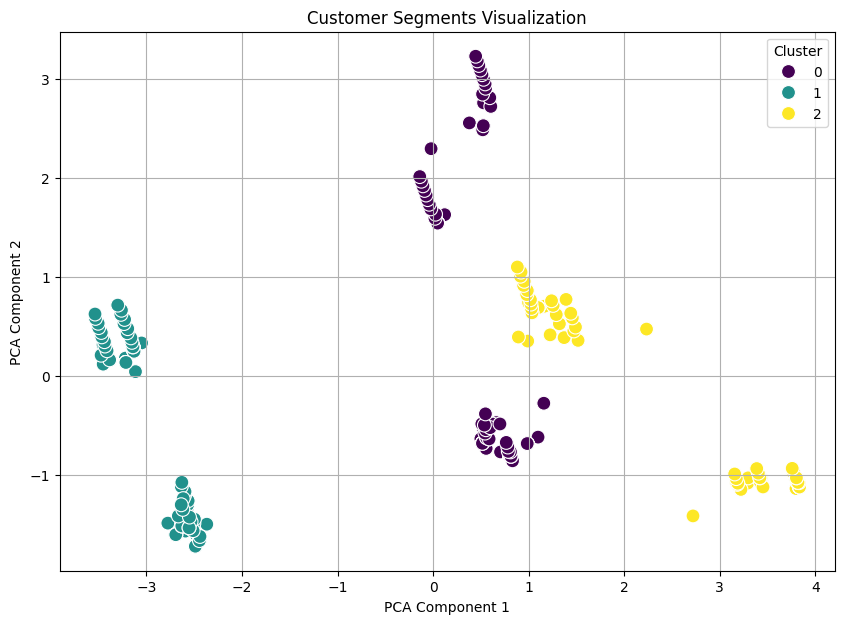

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()